# Info sui dunder methods nei file cell.py e grid.py:
Data una **classe**, le funzioni al loro interno prendono il nome di **metodi**. I metodi che iniziano e finiscono con **__** vengono chiamati **metodi speciali**, **metodi magici** o **dunder methods**. 
Ecco alcuni esempi di dunder methods:
* **__init__()**: Costruttore della classe, chiamato quando si crea una nuova istanza. Viene chiamato automaticamente quando si crea un nuovo oggetto di una classe.
* **__lt__()**: Utilizzato per definire il comportamento dell'operatore <. Viene chiamato quando si usa l'operatore < tra due oggetti. Il metodo restituisce un valore booleano (True o False) a seconda del risultato del confronto tra l'istanza corrente e l'oggetto da confrontare.
* **__iter()__** e **__next()__**: Considerando le seguenti righe di codice:
    ```python
    class CellList:
        """Used to hold lists of cells on each pixel while keeping cancer cells and healthy cells sorted
        """

        def __init__(self):
            self.size = 0
            self.num_c_cells = 0
            self.cancer_cells = []
            self.healthy_cells = []

        def __iter__(self):
            """Needed to iterate on the list object"""
            self._iter_count = -1
            return self

        def __next__(self):
            """Needed to iterate on the list object"""
            self._iter_count += 1
            if self._iter_count < self.num_c_cells:
                return self.cancer_cells[self._iter_count] # Return one element (one cell)
            elif self._iter_count < self.size:
                return self.healthy_cells[self._iter_count - self.num_c_cells]
            else:
                raise StopIteration
    ```
    * **__iter()__**: Permette di rendere l'oggetto iterabile. *self._iter_count* è un contatore utilizzato per tenere traccia dell'indice dell'iterazione. Il metodo restituisce *self*, rendendo l'oggetto stesso l'iteratore.
    * **__next__()**: Definisce cosa succede quando l'oggetto viene iterato (ad esempio in un ciclo for).

* **__str__()**: Definisce la rappresentazione a stringa leggibile di un oggetto, utilizzata quando si chiama print() sull'oggetto. Viene chiamato automaticamente quando si utilizza print() o str() su un oggetto
* **__add__()**: Definisce il comportamento dell'operatore + per la classe.
* **__len()__**: Deve essere implementato nella classe per rendere possibile l'utilizzo della funzione len() sull'istanza dell'oggetto.
* **__getitem()__**: Deve essere implementato in una classe per rendere possibile l'uso delle parentesi quadre per accedere agli elementi dell'oggetto.


I metodi speciali permettono di personalizzare il comportamento degli operatori e delle funzioni di Python per le istanze delle classi definite dall'utente.

# **ciclo cellulare** (cell.py):

## Funzione *cycle*
Qui c'è l'analisi delle funzioni *cycle* all'interno delle classi *HealthyCell*, *CancerCell* e *OARCell*

### Passaggi Comuni e Differenze delle Funzioni **cycle** nelle Classi **HealthyCell**, **CancerCell** e **OARCell**

1. **Verifica dei Livelli Critici di Glucosio e Ossigeno**:
    - Se il livello di glucosio è inferiore al **critical_glucose_level** o il livello di ossigeno è inferiore al **critical_oxygen_level**, la cellula muore.
    - Il conteggio delle cellule specifico per ciascuna classe viene decrementato.
        - **HealthyCell**: **HealthyCell.cell_count -= 1**
        - **CancerCell**: **CancerCell.cell_count -= 1**
        - **OARCell**: **OARCell.cell_count -= 1**
    - La funzione restituisce **(0, 0)** (per **OARCell**, la funzione restituisce **(0, 0, 2)**).

2. **Invecchiamento della Cellula o Riduzione del Tempo di Riparazione**:
    - Se la cellula non è nella fase di riparazione (**self.repair == 0**), l'età della cellula (**self.age**) aumenta di uno.
    - Se la cellula è nella fase di riparazione (**self.repair != 0**), il tempo di riparazione (**self.repair**) diminuisce di uno.

3. **Fase Quiescente (Fase 4)**:
    - Se la cellula è nella fase quiescente:
      - Verifica se il glucosio è sopra il **quiescent_glucose_level**, il numero di vicini è inferiore a **critical_neighbors** e l'ossigeno è superiore al **quiescent_oxygen_level**.
      - Se tutte queste condizioni sono soddisfatte, la cellula passa alla fase 0 e la sua età viene resettata a 0.
      - La funzione restituisce l'efficienza ridotta del 25% sia per l'assorbimento di glucosio che per il consumo di ossigeno.
    - **In CancerCell non c'è fase 4.**

4. **Fase di Mitosi (Fase 3)**:
    - Se la cellula è nella fase di mitosi e l'età è 1:
      - Passa alla fase 0 e la sua età viene resettata a 0.
      - La funzione restituisce l'efficienza completa sia per l'assorbimento di glucosio che per il consumo di ossigeno.
      - **Differenza in HealthyCell**: La funzione restituisce **(self.efficiency, self.oxy_efficiency, 0)**.
      - **Differenza in CancerCell**: La funzione restituisce **(self.efficiency, self.oxy_efficiency, 1)**.
      - **Differenza in OARCell**: La funzione restituisce **(self.efficiency, self.oxy_efficiency, 3)**.

5. **Fase Gap 2 (Fase 2)**:
    - Se la cellula è nella fase Gap 2:
      - Verifica se l'età della cellula è 4. Se sì, passa alla fase 3 e la sua età viene resettata a 0.
      - La funzione restituisce l'efficienza completa sia per l'assorbimento di glucosio che per il consumo di ossigeno.

6. **Fase di Sintesi (Fase 1)**:
    - Se la cellula è nella fase di sintesi:
      - Verifica se l'età della cellula è 8. Se sì, passa alla fase 2 e la sua età viene resettata a 0.
      - La funzione restituisce l'efficienza completa sia per l'assorbimento di glucosio che per il consumo di ossigeno.

7. **Fase Gap 1 (Fase 0)**:
    - Se la cellula è nella fase Gap 1:
      - Verifica se il glucosio è inferiore al **quiescent_glucose_level**, il numero di vicini è superiore a **critical_neighbors** o l'ossigeno è inferiore al **quiescent_oxygen_level**. Se sì, la cellula passa alla fase 4 e la sua età viene resettata a 0.
      - Mentre, se l'età della cellula è 11, passa alla fase 1 e la sua età viene resettata a 0.
      - La funzione restituisce l'efficienza completa sia per l'assorbimento di glucosio che per il consumo di ossigeno.

### Note sulle Differenze

- **Efficienza**:
    - **HealthyCell**:
      ```python
      self.efficiency = average_glucose_absorption * factor
      self.oxy_efficiency = average_oxygen_consumption * factor
      ```
    - **CancerCell**:
      ```python
      self.efficiency = average_cancer_glucose_absorption * factor
      self.oxy_efficiency = average_oxygen_consumption * factor
      ```
    - **OARCell**:
      ```python
      self.efficiency = average_glucose_absorption * factor
      self.oxy_efficiency = average_oxygen_consumption * factor
      ```

---
**NOTA**:
Il motivo per cui **HealthyCell**, **CancerCell** e **OARCell** restituiscono valori diversi (0, 1, 3 rispettivamente) quando si trovano nella fase di mitosi è dovuto alla necessità di differenziare i tipi di cellule e adattare le risposte della simulazione in base al contesto biologico e alle priorità del trattamento. Ad esempio: le cellule cancerose (1) potrebbero essere più sensibili alla radioterapia durante la mitosi rispetto alle cellule sane (0). Lo stesso dovrebbe valere per le altre fasi della cellula.

Un'altra cosa da notare è che le cellule cancerose non entrano nella fase quiescente perché mancano dei meccanismi di regolazione che interrompono la proliferazione in risposta a condizioni sfavorevoli.

### Classe OARCell e Variabile **worth**

La classe **OARCell** rappresenta un tipo di cellula nell'ambiente simulato e ha un attributo di classe chiamato **worth**. Questo attributo è utilizzato per determinare il "valore" o l'importanza della cellula quando si confrontano e si ordinano diverse cellule.

### Descrizione dell'Attributo **worth** e della Funzione **cell_type** nella Classe **OARCell**:

### Attributo **worth**
- **OARCell.worth** è un attributo di classe che rappresenta il valore o l'importanza di **OARCell**.
- Questo attributo viene impostato durante la costruzione di un'istanza di **OARCell** ed è utilizzato per determinare il tipo e l'ordine delle cellule nelle operazioni di confronto e ordinamento.

### Funzione **cell_type**
- La funzione **cell_type** nella classe **OARCell** restituisce il valore di **OARCell.worth**.
- Questo valore può essere utilizzato per ordinare le cellule o per confrontare l'importanza relativa delle cellule all'interno del modello.

### Utilizzo di **worth**
L'attributo **worth** è utile in vari contesti all'interno della simulazione, come ad esempio:
- **Ordinamento delle Cellule**: Quando è necessario ordinare le cellule in base alla loro importanza o priorità, il valore **worth** viene utilizzato come criterio di ordinamento.
- **Decisioni di Trattamento**: In un modello di simulazione di trattamento, le cellule con diversi valori di **worth** potrebbero ricevere priorità di trattamento differenti (ad esempio, le cellule degli organi a rischio potrebbero essere trattate con maggiore cautela rispetto alle cellule cancerose).

## Funzione **cycle_cells()** (grid.py)

La funzione esegue le seguenti operazioni:

- Accesso ad ogni voxel della griglia e ad ogni cellula nel voxel
    - Esecuzione di un ciclo cellulare alla cellula presa in considerazione
    - Gestione della mitosi
- La griglia di ossigeno e glucosio viene aggiornata in base al consumo della cellula
- Eliminazione cellule morte
- Se sono state rimosse delle cellule cioè, se **count** (numero di cellule prima dell'eliminazione) è più grande del numero di cellule attuali, vengono sottratte le cellule eliminate dalla matrice che tiene conto del numero di celule vicine (compreso il numero nel voxel attuale) **self.neigh_counts**
- Aggiunta di nuove cellule derivanti dal processo di mitosi e aggiornamento di self.neigh_counts


### Processo di mitosi

Il processo di mitosi viene eseguito analizzando ogni cellula all'interno di un singolo voxel e agendo in base allo stato rilevato di quella cellula. 
La mitosi avviene se la variabile **res**, cioè se il risultato della funzione **cycle**, ha più di due argomenti. Se questa condizione è verificata si distinuguono i seguenti casi:
-  **Mitosi di una cellula sana (res[2]=0)**: La nuova cellula viene posizionata in un voxel a bassa densità oppure passa allo stadio 4
- **Mitosi di una cellula cancerosa (res[2]=1)**: La nuova cellula viene posizionata casualmente in un voxel vicino 
- **Risveglio delle cellule OAR circostanti (res[2]=2)**: Viene controllato se nei voxel vicini ci sono cellule OAR. In questo caso la loro età e stage vengono poste a 0
- **(res[2]=3)**: Cerco fra i voxel vicini uno spazio disponibile dove non ci siano altre cellule OAR. Se uno spazio viene trovato, aggiungo una nuova cellula OAR allo stage 0 e con attributo **worth** uguale a 0. Se nessuno dei vicini rispetta la condizione, lo stage e l'età della cellula in analisi vengono posti a 4 e 0 rispettivamente. 


# Irradiazione

## **radiate()** (cell.py)
Ciascuna classe (HealtyCell, CancerCell, OARCell) ha la propria probabilità di sopravvivenza alla radiazione. 
- HealtyCell
    $$\text{{survival\_probability}} = e^{\text{{radiosensitivities}}[\text{{stage}}] \cdot (-\alpha_{\text{{norm\_tissue}}} \cdot \text{{dose}} - \beta_{\text{{norm\_tissue}}} \cdot \text{{dose}}^2)}$$
- CancerCell
    $$\text{{survival\_probability}} = e^{\text{{radiosensitivities}}[\text{{stage}}] \cdot (-\alpha_{\text{{tumor}}} \cdot \text{{dose}} - \beta_{\text{{tumor}}} \cdot \text{{dose}}^2)}$$
- OARCell
    $$\text{{survival\_probability}} = e^{\text{{radiosensitivities}}[\text{{stage}}] \cdot \left( -\alpha_{\text{{norm\_tissue}}} \cdot \text{{dose}} - \beta_{\text{{norm\_tissue}}} \cdot \text{{dose}}^2 \right)}$$

In tutti i casi, viene generato un numero casuale fra 0 e 1 per decidere se la cellula deve morire.
```python
if random.random() > survival_probability:
```
Nel caso in cui la condizione non venisse rispettata e se la dose è maggiore di 0.5, viene aggiornata la variabile self.repair. Questo non accade con la classe OARCell.

**self.repair**  rappresenta il tempo di riparazione necessario per una cellula sana dopo aver subito un danno. In particolare, la variabile tiene traccia di quante ore la cellula rimarrà in stato di riparazione, durante le quali non progredirà attraverso le fasi del ciclo cellulare (Gap 1, Synthesis, Gap 2, Mitosis).



## **irradiate()** (grid.py)
La funzione applica una dose di radiazione alle cellule in ogni voxel della griglia, calcolandone gli affetti in base alla distanza dal centro della radiazione e alla concentrazione locale di ossigeno. Quest'ultima influisce sull'efficacia della radioterapia. Per il centro della radiazione, se non specificato, viene utilizzato il centtro del tumore.

Gli effetti della radiazione vengono considerati solo all'interno di una distanza di 3 volte il raggio del tumore. Per irradiare ciascuna cellula viene usata la seguente righa di codice:
```python
cell.radiate(scale(radius, dist, multiplicator) * omf)
```

### Distribuzione e calcolo della dose

La dose viene calcolata con le seguenti funzioni:
```python
def conv(rad, x):
    denom = 3.8 # //sqrt(2) * 2.7
    return math.erf((rad - x)/denom) - math.erf((-rad - x) / denom)

def get_multiplicator(dose, radius):
    return dose / conv(14, 0)

def scale(radius, x, multiplicator):
    return multiplicator * conv(14, x * 10 / radius)

```

**Procedimento generale**: 

**conv()**: Calcola la **funzione di errore gaussiana**. Questa funzione è strettamente legata all'integrale della distribuzione normale. In particolare, la funzione di errore viene utilizzata per calcolare la **funzione di distribuzione cumulativa (CDF)** della distribuzione normale standardizzata.

Quando si integra una gaussiana su un intervallo limitato, ad esempio da $-\infty$ a *x*, si calcola la funzione di distribuzione cumulativa (CDF). Questo rappresenta la probabilità che una variabile aleatoria segua la distribuzione normale e sia minore o uguale a *x*.
- CDF: $$\Phi(x) = \int_{-\infty}^{x} \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(t - \mu)^2}{2 \sigma^2}} \, dt$$
-erf: $$\text{erf}(x) = \frac{2}{\sqrt{\pi}} \int_{0}^{x} e^{-t^2} \, dt$$

Entrambe calcolano aree sotto una curva gaussiana, tuttavia erf() viene definita in termini di un integrale esponenziale più semplice e viene utilizzata per calcolare in modo efficiente la probabilità cumulativa.

Fare la differenza tra due funzioni di distribuzione cumulativa (CDF) significa calcolare la probabilità che una variabile aleatoria con una determinata distribuzione cada all'interno di un intervallo specifico.

Come mai si preferisce usare erf() invece della CDF? Come accenato prima, erf() è direttamente collegata all'integrale della distribuzione normale standardizzata (senza trasformazioni ulteriori). Poiché la distribuzione normale standardizzata ha un'espressione complessa a causa dell'esponente quadratico nella sua funzione di densità di probabilità (PDF), l'integrale di questa espressione è difficile da risolvere esattamente. La funzione di errore fornisce una soluzione semplificata a questo integrale.


**scale()**: Calcola la dose effettiva di radiazione moltiplicando il fattore 
**multiplicator** per la funzione di errore. Questo serve a "scalare" la dose in base alla distanza dal centro del tumore. 

Ma perché non possiamo semplicemente moltiplicare la dose non scalata (dose) per conv()? Se conv restituisse valori compresi tra 0 e 1, come accade con le funzioni di distribuzione cumulativa (CDF), potremmo farlo. Tuttavia, poiché erf (la funzione che stiamo utilizzando) può restituire valori maggiori di 1 (ad esempio 2 se il moltiplicatore è pari a 1), ciò non è possibile. Per capire meglio, consideriamo il valore della dose al centro del tumore. Se moltiplicassimo la dose non scalata per il valore di conv al centro, otterremmo una dose più alta rispetto a quella che effettivamente usiamo. Invece, dividendo prima la dose massima per il valore di conv al centro, otteniamo la dose corretta: al centro otterremo il valore massimo della dose, come è giusto che sia (dato che al centro abbiamo la concentrazione massima), e non un valore maggiore. Lo stesso ragionamento vale per gli altri punti, più distanti dal centro.

**get_multiplicator()**: Calcola il fattore **multiplicator** appena descritto. Questo fattore viene ottenuto dividendo il valore massimo della dose per il valore della distribuzione al centro, poiché il massimo della dose si trova proprio al centro.



### Approfondimento sui parametri per il calcolo della distribuzione di radiazione

**Parametri di ingresso di conv(rad,x)**:
- rad: Raggio del tumore
- x: distanza del voxel dal centro del tumore

I parametri delle funzioni erf in conv sono (rad - x)/denom e (-rad - x)/denom dove:
- Il numeratore rappresenza la distanza del voxel dal centro dell tumore. 
- Il denominatore è un valore numerico di 3.8. Viene spiegato dopo.

**Parametri di chiamata di conv(14, x * 10 / radius)**
NON SO. Però considerando una distanza dal centro di 30, ottengo i seguenti valori di x * 10 / radius

<div style="width: 100%; height: 50px; overflow: auto; border: 1px solid black; padding: 10px;">
<pre>
-30.000 -29.000 -28.000 -27.000 -26.000 -25.000 -24.000 -23.000 -22.000 -21.000 -20.000 -19.000 -18.000 -17.000 -16.000 -15.000 -14.000 -13.000 -12.000 -11.000 -10.000 -9.000 -8.000 -7.000 -6.000 -5.000 -4.000 -3.000 -2.000 -1.000 0.000 1.000 2.000 3.000 4.000 5.000 6.000 7.000 8.000 9.000 10.000 11.000 12.000 13.000 14.000 15.000 16.000 17.000 18.000 19.000 20.000 21.000 22.000 23.000 24.000 25.000 26.000 27.000 28.000 29.000 30.000
-21.429 -20.714 -20.000 -19.286 -18.571 -17.857 -17.143 -16.429 -15.714 -15.000 -14.286 -13.571 -12.857 -12.143 -11.429 -10.714 -10.000 -9.286 -8.571 -7.857 -7.143 -6.429 -5.714 -5.000 -4.286 -3.571 -2.857 -2.143 -1.429 -0.714 0.000 0.714 1.429 2.143 2.857 3.571 4.286 5.000 5.714 6.429 7.143 7.857 8.571 9.286 10.000 10.714 11.429 12.143 12.857 13.571 14.286 15.000 15.714 16.429 17.143 17.857 18.571 19.286 20.000 20.714 21.429
</pre>
</div>

Noto che gli estremi sono cambiati, al posto di -30 si ha -21 e al posto di 30, 21. Il centro rimane lo stesso.

**Calcolo dei due termini della funzione conv per ciascuno dei tre valori di x: 0, 30 e 5**. Questi permettono di confrontare l'evoluzione della probabilità cumulativa. I seguenti valori possono essere osservati anche guardando il grafico di una CDF. 

Valori dei parametri:
- rad = 14
- denom = 3.

1. **x = 0**:

    Calcolo dei termini di conv:

    $$
    \text{erf}\left(\frac{(14 - 0)}{3.8}\right) = \text{erf}(3.6842) \approx 0.9998
    $$
    $$
    \text{erf}\left(\frac{(-14 - 0)}{3.8}\right) = \text{erf}(-3.6842) \approx -0.9998
    $$

    Calcolo di conv:

    $$
    \text{conv} = 0.9998 - (-0.9998) = 1.9996
    $$

2. **x = 30**

    Calcolo dei termini di conv:

    $$
    \text{erf}\left(\frac{(14 - 30)}{3.8}\right) = \text{erf}\left(\frac{-16}{3.8}\right) = \text{erf}(-4.2105) \approx -1
    $$
    $$
    \text{erf}\left(\frac{(-14 - 30)}{3.8}\right) = \text{erf}\left(\frac{-44}{3.8}\right) = \text{erf}(-11.5789) \approx -1
    $$

    Calcolo di conv:

    $$
    \text{conv} = -1 - (-1) = 0
    $$

3. x = 5

   Calcolo dei termini di conv:

   $$
   \text{erf}\left(\frac{(14 - 5)}{3.8}\right) = \text{erf}\left(\frac{9}{3.8}\right) = \text{erf}(2.3684) \approx 0.9992
   $$
   $$
   \text{erf}\left(\frac{(-14 - 5)}{3.8}\right) = \text{erf}\left(\frac{-19}{3.8}\right) = \text{erf}(-5.0) \approx -1
   $$

   Calcolo di conv:

   $$
   \text{conv} = 0.9992 - (-1) = 1.9992
   $$




**Come mai si divide per 3.8?**: Scegliere un valore come 3.8 modifica la pendenza della curva sigmoide rappresentata dalla funzione conv. Questo parametro agisce come una sorta di "fattore di smussamento", regolando quanto ampia o stretta è la transizione tra i valori estremi della funzione erf. In pratica, 3.8 è stato scelto probabilmente per ottenere una specifica larghezza o forma della curva, in modo che corrisponda a determinati requisiti del modello o fenomeno fisico che si sta descrivendo.

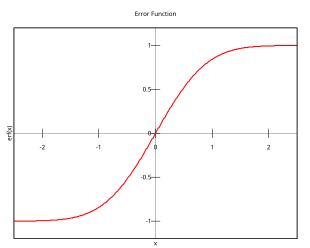